In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split

from utils import *

## **Data for Polynomial Regression Model**

In [2]:
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1)

In [4]:
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


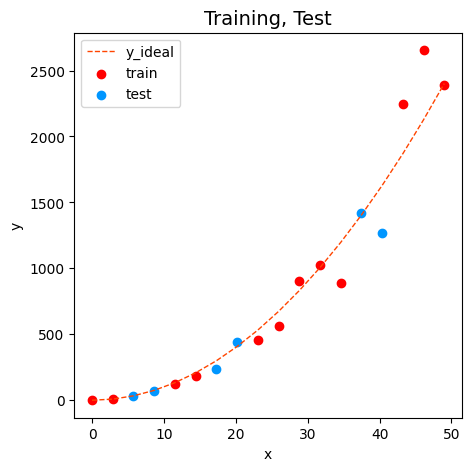

In [5]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x_ideal, y_ideal, "--",color="orangered", label="y_ideal",lw=1)
ax.set_title("Training, Test", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_test, y_test, color='#0096ff', label='test')
ax.legend(loc='upper left')
plt.show()

## **Polynomial Regression Model with and without Regularization**

In [6]:
degree = 10

linmodel = LinModel(degree=degree)
linmodel.fit(X_train=X_train, y_train=y_train)

In [7]:
ypred = linmodel.predict(X=X_train)
train_err = linmodel.mse(y=y_train, ypred=ypred)

In [8]:
ypred = linmodel.predict(X=X_test)
test_err = linmodel.mse(y=y_test, ypred=ypred)

In [9]:
print(f"Training error: {train_err:0.2f}, Testing error: {test_err:0.2f}")

Training error: 58.01, Testing error: 171215.01


In [10]:
x = np.linspace(0, int(X.max()), 100)
ypred = linmodel.predict(X=x).reshape(-1,1)

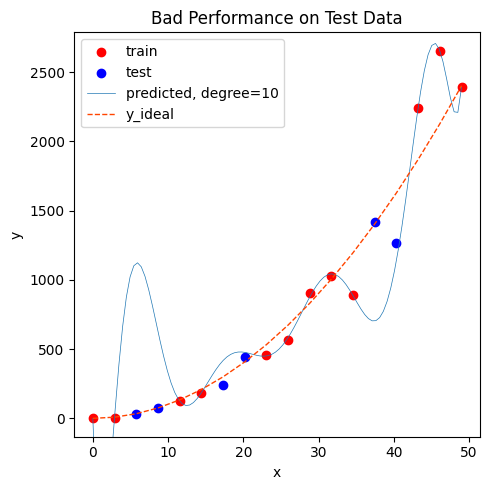

In [13]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.set_title("Bad Performance on Test Data", fontsize=12)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="red", label="train")
ax.scatter(X_test, y_test, color="blue", label="test")
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())
ax.plot(x, ypred, lw=0.5, label=f"predicted, degree={degree}")
ax.plot(x_ideal, y_ideal, "--", color="orangered", label="y_ideal", lw=1)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()